In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as lm

import sklearn.metrics as metrics

In [2]:
df = pd.read_csv("football_players_dataset_traits_processed.csv", index_col=0)
df.head()

short_name                            full_name  age dateOfBirth  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   
2           J. Oblak                            Jan Oblak   28  1993-01-07   
3       K. De Bruyne                      Kevin De Bruyne   29  1991-06-28   
4          Neymar Jr        Neymar da Silva Santos Júnior   28  1992-02-05   

   height  weight           positions                 club  \
0     170      72  ['RW', 'ST', 'CF']         FC Barcelona   
1     188      83        ['ST', 'LW']             Juventus   
2     188      87              ['GK']      Atlético Madrid   
3     180      70       ['CM', 'CAM']      Manchester City   
4     175      68       ['LW', 'CAM']  Paris Saint-Germain   

   contract_valid_until  overall_rating  ...  LW  RW  CAM CM  CDM  LB  CB RB  \
0                  2021              93  ...   0   1    0  0    0   0   0  0   
1                  2022              92  ...   1   0    0  0    0   0   0  0   
2                  2023              91  ...   0   0    0  0    0   0   0  0   
3                  2023              91  ...   0   0    1  1    0   0   0  0   
4                  2022              91  ...   1   0    1  0    0   0   0  0   

   GK  years_left_on_contract  
0   0                       0  
1   0                       1  
2   1                       2  
3   0                       2  
4   0                       1  

[5 rows x 64 columns]

In [3]:
df["att_work_rate"] = df.work_rate.apply(lambda x : x.split("/")[0])
df["def_work_rate"] = df.work_rate.apply(lambda x : x.split("/")[1])

In [4]:
df.columns.to_list()

['short_name',
 'full_name',
 'age',
 'dateOfBirth',
 'height',
 'weight',
 'positions',
 'club',
 'contract_valid_until',
 'overall_rating',
 'potential',
 'value',
 'wage',
 'prefered_foot',
 'weak_foot',
 'skill_moves',
 'rep_inter',
 'work_rate',
 'release_clause',
 'atk_crossing',
 'atk_finishing',
 'atk_heading_accuracy',
 'atk_short_passing',
 'atk_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'mvmt_acceleration',
 'mvmt_sprint_speed',
 'mvmt_agility',
 'mvmt_reactions',
 'mvmt_balance',
 'pow_shot_power',
 'pow_jumping',
 'pow_stamina',
 'pow_strength',
 'pow_long_shots',
 'ment_aggression',
 'ment_interceptions',
 'ment_positioning',
 'ment_vision',
 'ment_penalties',
 'ment_composure',
 'def_defensive_awareness',
 'def_standing_tackle',
 'def_sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positionning',
 'gk_reflexes',
 'ST',
 'LW',
 'RW',
 'CAM',
 'CM',
 'CDM',
 'LB',
 'CB',
 'RB',
 'GK'

In [5]:
df["rep_inter"].head()

0    5
1    5
2    3
3    4
4    5
Name: rep_inter, dtype: int64

In [6]:
df_dummies = pd.get_dummies(df[["club", "prefered_foot", "att_work_rate", "def_work_rate"]])

In [7]:
df_dummies.head()

club_1. FC Heidenheim 1846  club_1. FC Kaiserslautern  club_1. FC Köln  \
0                           0                          0                0   
1                           0                          0                0   
2                           0                          0                0   
3                           0                          0                0   
4                           0                          0                0   

   club_1. FC Magdeburg  club_1. FC Nürnberg  club_1. FC Saarbrücken  \
0                     0                    0                       0   
1                     0                    0                       0   
2                     0                    0                       0   
3                     0                    0                       0   
4                     0                    0                       0   

   club_1. FC Union Berlin  club_1. FSV Mainz 05  club_AC Ajaccio  \
0                        0                     0                0   
1                        0                     0                0   
2                        0                     0                0   
3                        0                     0                0   
4                        0                     0                0   

   club_AC Horsens  ...  club_Östersunds FK  club_Śląsk Wrocław  \
0                0  ...                   0                   0   
1                0  ...                   0                   0   
2                0  ...                   0                   0   
3                0  ...                   0                   0   
4                0  ...                   0                   0   

   prefered_foot_Left  prefered_foot_Right  att_work_rate_High  \
0                   1                    0                   0   
1                   0                    1                   1   
2                   0                    1                   0   
3                   0                    1                   1   
4                   0                    1                   1   

   att_work_rate_Low  att_work_rate_Medium  def_work_rate_ High  \
0                  0                     1                    0   
1                  0                     0                    0   
2                  0                     1                    0   
3                  0                     0                    1   
4                  0                     0                    0   

   def_work_rate_ Low  def_work_rate_ Medium  
0                   1                      0  
1                   1                      0  
2                   0                      1  
3                   0                      0  
4                   0                      1  

[5 rows x 689 columns]

In [8]:
df = df.join(df_dummies)

In [9]:
df.columns.to_list()

['short_name',
 'full_name',
 'age',
 'dateOfBirth',
 'height',
 'weight',
 'positions',
 'club',
 'contract_valid_until',
 'overall_rating',
 'potential',
 'value',
 'wage',
 'prefered_foot',
 'weak_foot',
 'skill_moves',
 'rep_inter',
 'work_rate',
 'release_clause',
 'atk_crossing',
 'atk_finishing',
 'atk_heading_accuracy',
 'atk_short_passing',
 'atk_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'mvmt_acceleration',
 'mvmt_sprint_speed',
 'mvmt_agility',
 'mvmt_reactions',
 'mvmt_balance',
 'pow_shot_power',
 'pow_jumping',
 'pow_stamina',
 'pow_strength',
 'pow_long_shots',
 'ment_aggression',
 'ment_interceptions',
 'ment_positioning',
 'ment_vision',
 'ment_penalties',
 'ment_composure',
 'def_defensive_awareness',
 'def_standing_tackle',
 'def_sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positionning',
 'gk_reflexes',
 'ST',
 'LW',
 'RW',
 'CAM',
 'CM',
 'CDM',
 'LB',
 'CB',
 'RB',
 'GK'

In [10]:
final_df = df.drop(columns=["full_name", "dateOfBirth", "positions", "club", "contract_valid_until", "prefered_foot", "work_rate", "att_work_rate", "def_work_rate"])

In [11]:
final_df.columns.to_list()

['short_name',
 'age',
 'height',
 'weight',
 'overall_rating',
 'potential',
 'value',
 'wage',
 'weak_foot',
 'skill_moves',
 'rep_inter',
 'release_clause',
 'atk_crossing',
 'atk_finishing',
 'atk_heading_accuracy',
 'atk_short_passing',
 'atk_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'mvmt_acceleration',
 'mvmt_sprint_speed',
 'mvmt_agility',
 'mvmt_reactions',
 'mvmt_balance',
 'pow_shot_power',
 'pow_jumping',
 'pow_stamina',
 'pow_strength',
 'pow_long_shots',
 'ment_aggression',
 'ment_interceptions',
 'ment_positioning',
 'ment_vision',
 'ment_penalties',
 'ment_composure',
 'def_defensive_awareness',
 'def_standing_tackle',
 'def_sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positionning',
 'gk_reflexes',
 'ST',
 'LW',
 'RW',
 'CAM',
 'CM',
 'CDM',
 'LB',
 'CB',
 'RB',
 'GK',
 'years_left_on_contract',
 'club_1. FC Heidenheim 1846',
 'club_1. FC Kaiserslautern',
 'club_1. FC Köln',


# Prédiciton Random Forest (regression)

In [12]:
X = final_df.drop(columns=["value"])
y = final_df["value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
X_train.shape

(12472, 745)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([('scaler', StandardScaler()), ('RandomForest', RandomForestRegressor())])

pipeline.fit(X_train.drop(columns=["short_name"]), y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('RandomForest', RandomForestRegressor())])

In [15]:
y_pred = pipeline.predict(X_test.drop(columns=["short_name"]))

In [16]:
metrics.mean_squared_error(y_test, y_pred, squared=False)

802184.6726536048

In [17]:
metrics.r2_score(y_test, y_pred)

0.9891874153743725

In [18]:
X_test.shape, y_test.shape, y_pred.shape

((6143, 745), (6143,), (6143,))

In [20]:
feature_importance = pipeline.named_steps['RandomForest'].feature_importances_

columns = X_train.drop(columns=["short_name"]).columns.to_list()

len(feature_importance), len(columns)

d = {'column': columns, 'feature_importance': feature_importance}

features_importance = pd.DataFrame(data=d)
features_importance = features_importance.sort_values(by=['feature_importance'], ascending=False)
features_importance.head(20)

column  feature_importance
9        release_clause            0.918403
3        overall_rating            0.054916
4             potential            0.011422
5                  wage            0.001692
0                   age            0.001435
21    mvmt_sprint_speed            0.001196
43          gk_reflexes            0.001025
23       mvmt_reactions            0.000780
742  def_work_rate_ Low            0.000620
11        atk_finishing            0.000586
35       ment_composure            0.000397
15      skill_dribbling            0.000310
32     ment_positioning            0.000307
27          pow_stamina            0.000301
40          gk_handling            0.000298
20    mvmt_acceleration            0.000290
18   skill_long_passing            0.000276
22         mvmt_agility            0.000270
10         atk_crossing            0.000265
2                weight            0.000263

In [21]:
final_df["predicted_value"] = pipeline.predict(final_df.drop(columns=["short_name", "value"]))

In [22]:
final_df.head(10)

short_name  age  height  weight  overall_rating  potential  \
0           L. Messi   33     170      72              93         93   
1  Cristiano Ronaldo   35     188      83              92         92   
2           J. Oblak   28     188      87              91         93   
3       K. De Bruyne   29     180      70              91         91   
4          Neymar Jr   28     175      68              91         91   
5     R. Lewandowski   32     183      80              91         91   
6          K. Mbappé   22     178      73              90         95   
7            Alisson   28     190      91              90         91   
8           M. Salah   28     175      71              90         90   
9            S. Mané   28     175      69              90         90   

         value      wage  weak_foot  skill_moves  ...  club_Śląsk Wrocław  \
0  103500000.0  560000.0          4            4  ...                   0   
1   63000000.0  220000.0          4            5  ...                   0   
2  120000000.0  125000.0          3            1  ...                   0   
3  127500000.0  370000.0          5            4  ...                   0   
4  132000000.0  270000.0          5            5  ...                   0   
5  111000000.0  240000.0          4            4  ...                   0   
6  185500000.0  160000.0          4            5  ...                   0   
7  102000000.0  160000.0          3            1  ...                   0   
8  120500000.0  250000.0          3            4  ...                   0   
9  120500000.0  250000.0          4            4  ...                   0   

   prefered_foot_Left  prefered_foot_Right  att_work_rate_High  \
0                   1                    0                   0   
1                   0                    1                   1   
2                   0                    1                   0   
3                   0                    1                   1   
4                   0                    1                   1   
5                   0                    1                   1   
6                   0                    1                   1   
7                   0                    1                   0   
8                   1                    0                   1   
9                   0                    1                   1   

   att_work_rate_Low  att_work_rate_Medium  def_work_rate_ High  \
0                  0                     1                    0   
1                  0                     0                    0   
2                  0                     1                    0   
3                  0                     0                    1   
4                  0                     0                    0   
5                  0                     0                    0   
6                  0                     0                    0   
7                  0                     1                    0   
8                  0                     0                    0   
9                  0                     0                    0   

   def_work_rate_ Low  def_work_rate_ Medium  predicted_value  
0                   1                      0      129305000.0  
1                   1                      0       60870000.0  
2                   0                      1      117855000.0  
3                   0                      0      122860000.0  
4                   0                      1      129310000.0  
5                   0                      1      103070000.0  
6                   1                      0      163905000.0  
7                   0                      1      101635000.0  
8                   0                      1      125750000.0  
9                   0                      1      124210000.0  

[10 rows x 747 columns]

In [23]:
final_df[final_df["short_name"]== "M. Maignan"]

short_name  age  height  weight  overall_rating  potential       value  \
227  M. Maignan   25     190      91              82         86  34500000.0   

        wage  weak_foot  skill_moves  ...  club_Śląsk Wrocław  \
227  31000.0          3            1  ...                   0   

     prefered_foot_Left  prefered_foot_Right  att_work_rate_High  \
227                   0                    1                   0   

     att_work_rate_Low  att_work_rate_Medium  def_work_rate_ High  \
227                  0                     1                    0   

     def_work_rate_ Low  def_work_rate_ Medium  predicted_value  
227                   0                      1       33160000.0  

[1 rows x 747 columns]

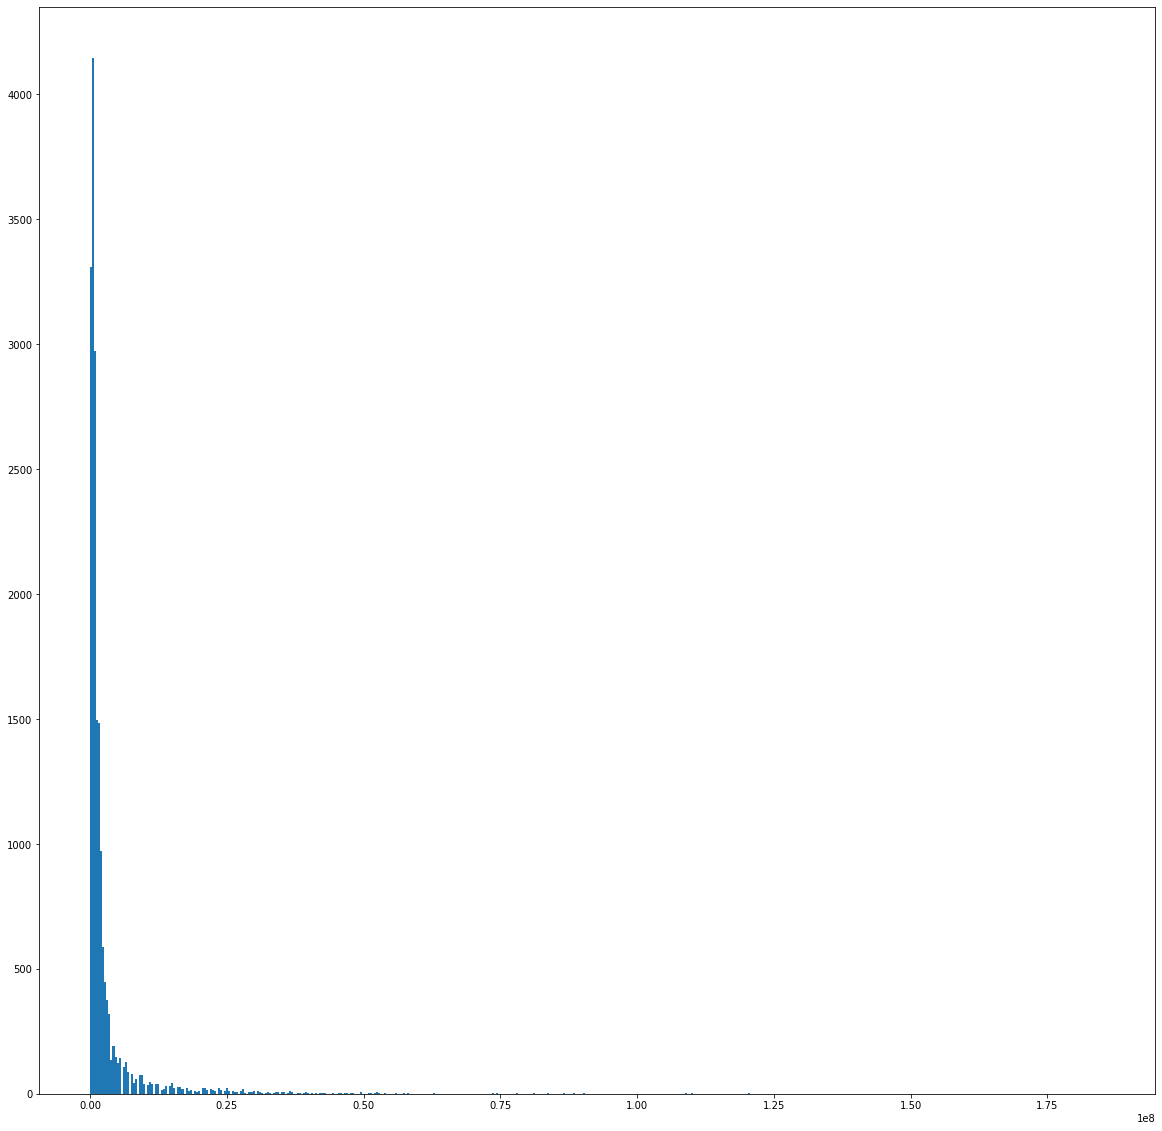

In [24]:
plt.figure(figsize=(20,20))
plt.hist(final_df["value"], bins=500)
plt.show()

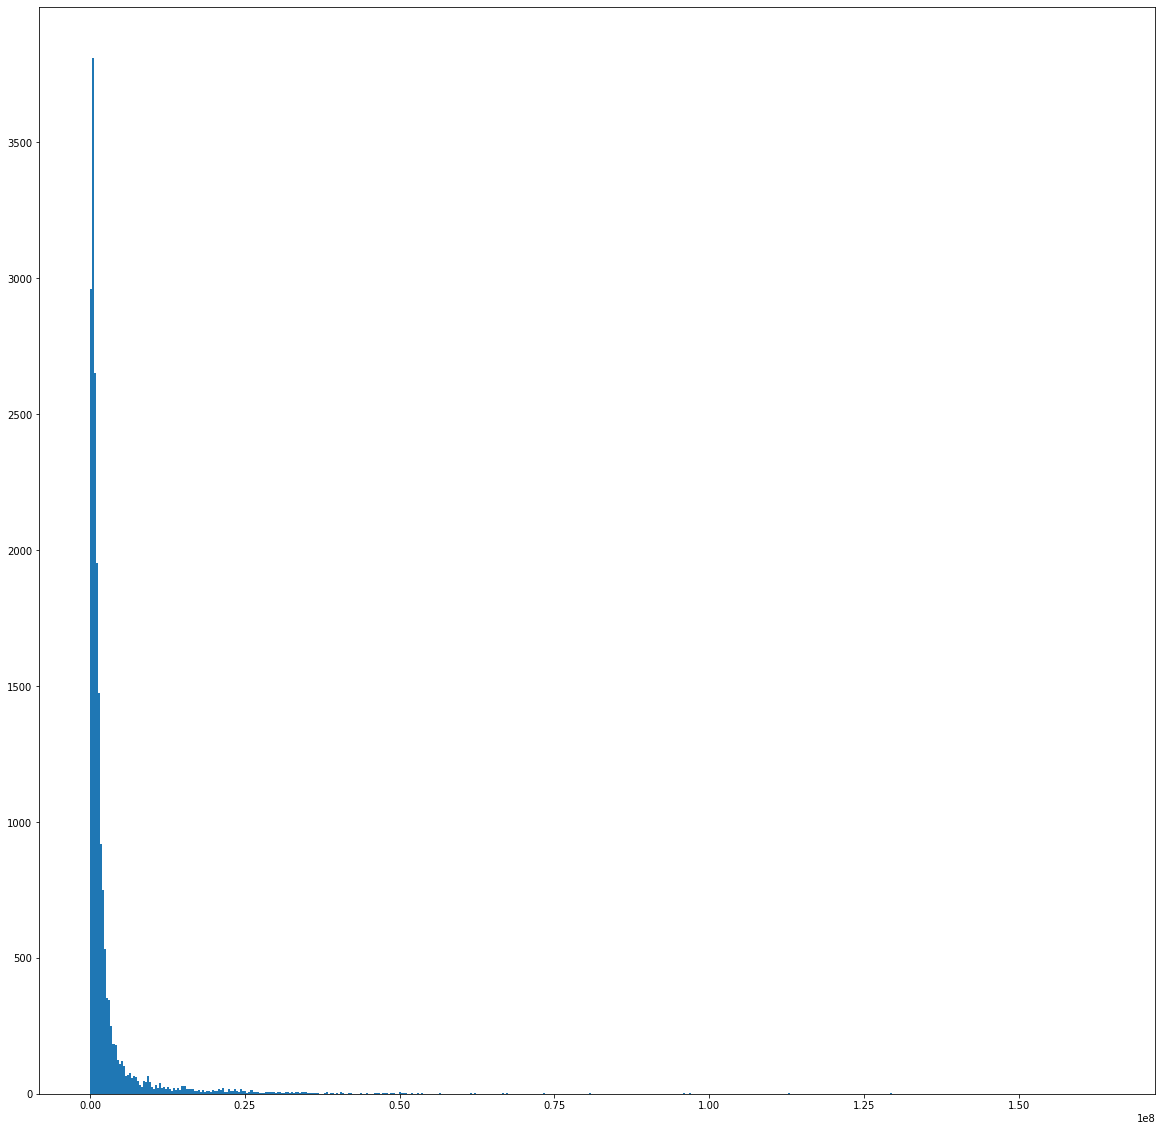

In [25]:
plt.figure(figsize=(20,20))
plt.hist(final_df["predicted_value"], bins=500)
plt.show()

In [27]:
pipeline.score(X_test.drop(columns=["short_name"]), y_test)

0.9891874153743725

In [28]:
metrics.mean_squared_error(y_test, y_pred, squared=False)

802184.6726536048

In [29]:
-8.689771e+04

-86897.71

In [30]:
features_importance[features_importance["column"]=="club_LOSC Lille"]

column  feature_importance
416  club_LOSC Lille        6.780432e-07

In [ ]:
df[df["club"]=="LOSC Lille"]